<a href="https://colab.research.google.com/github/jzam0ra/AlgorithmsUN2024I-Lab2/blob/main/JaimeZamoraLab2_REAL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "setuptools <65"

In [2]:
pip install -U fortran-magic==0.7

In [2]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

In [46]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [47]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [48]:
%%time

matmul(a, b)

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 39.8 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.150
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.30
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [49]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [50]:
%%time

matmul(a, b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [52]:
def matmul_corregida(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    if len(A[0]) != len(B):
        print("Los tamaños de las matrices son incompatibles")
        return None
    elif len(A[0]) == len(B):
        out = [[0 for col in range(cols_out)] for row in range(rows_out)]

        for i in range(rows_out):
            for j in range(cols_out):
                for k in range(len(A[0])):
                    out[i][j] += A[i][k] * B[k][j]
        return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [53]:
%%time

matmul_corregida(a, b)

Los tamaños de las matrices son incompatibles
CPU times: user 1.05 ms, sys: 0 ns, total: 1.05 ms
Wall time: 1.06 ms


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [54]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1],
     [2],
     [3]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [55]:
%%time

matmul_corregida(a, b)

CPU times: user 23 µs, sys: 3 µs, total: 26 µs
Wall time: 30 µs


[[14], [20], [38], [6]]

In [56]:
import random

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.7555134341718946, 0.8439459422716522, 0.4527545951487003],
 [0.7170910450879446, 0.9993841501967596, 0.40662562915959133]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [59]:
import time
import pandas as pd
def avg_execution(process_to_measure, matrix_gen, times_to_run):

  so_far = 0
  avg_time = 0
  exec_time_lst = []

  while True:
    if so_far == 10:
      break
    a = matrix_gen(600, 100)
    b = matrix_gen(100, 600)
    initial_time = time.time()
    a = process_to_measure(a,b)
    exec_time_lst.append(time.time() - initial_time)
    so_far = so_far + 1
  print(times_to_run)
  for duration in exec_time_lst:
    avg_time = avg_time + duration
  avg_time = avg_time/times_to_run

  print(avg_time)
  return avg_time

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [60]:
analysis_df = pd.DataFrame(columns=['Language', 'Average Secs'])

avg_python = avg_execution(matmul_corregida, random_matrix, 10)
analysis_df.loc[-1] = ['Python', avg_python]
analysis_df.index = analysis_df.index + 1
print(analysis_df)

10
9.912863707542419
  Language  Average Secs
0   Python      9.912864


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [61]:
def random_matrix_np(m, n):

    return np.random.rand(m, n)

randm = random_matrix_np(2, 3)
randm

array([[0.29079996, 0.53648671, 0.03223361],
       [0.63980182, 0.21283221, 0.42131947]])

In [62]:
def avg_execution(process_to_measure, matrix_gen, times_to_run):

  so_far = 0
  avg_time = 0
  exec_time_lst = []

  while True:
    if so_far == 10:
      break
    a = matrix_gen(600, 100)
    b = matrix_gen(100, 600)
    initial_time = time.time()
    a = np.matmul(a,b)
    exec_time_lst.append(time.time() - initial_time)
    so_far = so_far + 1
  print(times_to_run)
  for duration in exec_time_lst:
    avg_time = avg_time + duration
  avg_time = avg_time/times_to_run

  print(avg_time)
  return avg_time

In [63]:
avg_np = avg_execution(matmul_corregida,random_matrix_np, 10)

analysis_df.loc[-1] = ['Numpy', avg_np]
analysis_df.index = analysis_df.index + 1
print(analysis_df)

10
0.004517245292663574
  Language  Average Secs
1   Python      9.912864
0    Numpy      0.004517


In [65]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [66]:
import numpy as np

In [67]:
%load_ext fortranmagic


The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [68]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [69]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [70]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.3 ms, sys: 0 ns, total: 12.3 ms
Wall time: 12.6 ms


333328333350000.0

In [71]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 194 µs, sys: 0 ns, total: 194 µs
Wall time: 201 µs


333328333350000.0

**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [72]:
# prompt: Defina una matriz A 2x2 y B 2x2

# Define matrix A (2x2)
A = [[1, 2],
     [3, 4]]

# Define matrix B (2x2)
B = [[5, 6],
     [7, 8]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [73]:
# prompt: Defining Fortran subroutine matmul(A,B) for 2x2 matrices

%%fortran
subroutine matmul(A, B, C)
    implicit none
    integer, intent(in) :: A(2,2), B(2,2)
    integer, intent(out) :: C(2,2)
    integer :: i, j, k

    do i = 1, 2
        do j = 1, 2
            C(i,j) = 0
            do k = 1, 2
                C(i,j) = C(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do
end subroutine matmul

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [74]:
# prompt: Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices
matmul(A, B)

array([[19, 22],
       [43, 50]], dtype=int32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [75]:
# prompt: Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices

%%fortran
subroutine matmul_fortran(A, B, C)
    implicit none
    integer, intent(in) :: A(600,100), B(100,600)
    integer, intent(out) :: C(600,600)
    integer :: i, j, k

    do i = 1, 600
        do j = 1, 600
            C(i,j) = 0
            do k = 1, 100
                C(i,j) = C(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do
end subroutine matmul_fortran

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [76]:
def avg_execution(process_to_measure, matrix_gen, times_to_run):

  so_far = 0
  avg_time = 0
  exec_time_lst = []

  while True:
    if so_far == 10:
      break
    a = matrix_gen(600, 100)
    b = matrix_gen(100, 600)
    initial_time = time.time()
    a = matmul_fortran(a,b)
    exec_time_lst.append(time.time() - initial_time)
    so_far = so_far + 1
  print(times_to_run)
  for duration in exec_time_lst:
    avg_time = avg_time + duration
  avg_time = avg_time/times_to_run

  print(avg_time)
  return avg_time

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [77]:
avg_fortran = avg_execution(matmul_fortran, random_matrix_np, 10)

analysis_df.loc[-1] = ['Fortran_magic', avg_fortran]
analysis_df.index = analysis_df.index + 1
print(analysis_df)

10
0.024698591232299803
        Language  Average Secs
2         Python      9.912864
1          Numpy      0.004517
0  Fortran_magic      0.024699


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [78]:
!apt-get install -y gfortran

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gfortran is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [81]:
%%writefile matrix_mult.f90
program matrix_mult
  implicit none
  integer, parameter :: n = 600, m = 100, p = 600
  integer :: i, j, k, iter
  real(8), allocatable :: A(:, :), B(:, :), C(:, :)
  real(8) :: start_time, end_time, total_time

  allocate(A(n, m), B(m, p), C(n, p))

  ! Initialize matrices A and B with random values
  call random_number(A)
  call random_number(B)

  ! Perform matrix multiplication 10 times
  do iter = 1, 10
    call cpu_time(start_time) ! Start timer

      do i = 1, n
        do j = 1, p
          C(i, j) = 0.0d0
          do k = 1, m
            C(i, j) = C(i, j) + A(i, k) * B(k, j)
          end do
        end do
      end do

    call cpu_time(end_time) ! End timer
    total_time = end_time - start_time
    print *, "Iteration ", iter, ": Time = ", total_time
  end do

  deallocate(A, B, C)
end program matrix_mult

Overwriting matrix_mult.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [83]:
start_time = time.time()
!gfortran matrix_mult.f90 -o matrix_mult
!./matrix_mult
final_time = time.time() - start_time
avg_fortran_real = final_time/10

analysis_df.loc[-1] = ['Fortran', avg_fortran_real]
analysis_df.index = analysis_df.index + 1
print(analysis_df)

 Iteration            1 : Time =   0.25378999999999996     
 Iteration            2 : Time =   0.22536099999999998     
 Iteration            3 : Time =   0.23326400000000003     
 Iteration            4 : Time =   0.22287199999999996     
 Iteration            5 : Time =   0.24273599999999995     
 Iteration            6 : Time =   0.22386599999999990     
 Iteration            7 : Time =   0.22569499999999998     
 Iteration            8 : Time =   0.22892399999999968     
 Iteration            9 : Time =   0.21832800000000008     
 Iteration           10 : Time =   0.24521899999999963     
        Language  Average Secs
5         Python      9.912864
4          Numpy      0.004517
3  Fortran_magic      0.024699
2        Fortran      0.022349
1        Fortran      0.021150
0        Fortran      0.252731


**My own example 18 - Adding Fortran average execution time to the data frame**

In [87]:
analysis_df = analysis_df.drop([1,2])
analysis_df

,Language,Average Secs
5,Python,9.912864
4,Numpy,0.004517
3,Fortran_magic,0.024699
0,Fortran,0.252731


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [98]:
%%writefile mat_mul.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define ROW_A 600
#define COL_A 100
#define ROW_B 100
#define COL_B 600

void fill_matrix(int rows, int cols, double matrix[rows][cols]) {
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            matrix[i][j] = rand() % 10; // Random values between 0 and 9
        }
    }
}

void multiply_matrices(double A[ROW_A][COL_A], double B[ROW_B][COL_B], double C[ROW_A][COL_B]) {
    for (int i = 0; i < ROW_A; i++) {
        for (int j = 0; j < COL_B; j++) {
            C[i][j] = 0;
            for (int k = 0; k < COL_A; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    double A[ROW_A][COL_A];
    double B[ROW_B][COL_B];
    double C[ROW_A][COL_B];

    // Seed for random number generation
    srand(time(NULL));

    // Initialize matrices A and B with random values
    fill_matrix(ROW_A, COL_A, A);
    fill_matrix(ROW_B, COL_B, B);

    clock_t start = clock();

    // Perform multiplication 10 times
    for (int i = 0; i < 10; i++) {
        multiply_matrices(A, B, C);
    }

    clock_t end = clock();
    double time_spent = (double)(end - start) / CLOCKS_PER_SEC;

    printf("Matrix multiplication completed 10 times.\n");
    printf("Time taken: %f seconds\n", time_spent);

    return 0;
}


Overwriting mat_mul.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [99]:
start_time = time.time()
!gcc mat_mul.c -o mat_mul
!./mat_mul
final_time = time.time() - start_time
avg_c_real = final_time/10

analysis_df.loc[-1] = ['C', avg_c_real]
analysis_df.index = analysis_df.index + 1
print(analysis_df)

Matrix multiplication completed 10 times.
Time taken: 1.986108 seconds
        Language  Average Secs
9         Python      9.912864
8          Numpy      0.004517
7  Fortran_magic      0.024699
4        Fortran      0.252731
2              C      0.022356
1              C      0.021205
0              C      0.221929


**My own example 21 - Adding c average execution time to the data frame**

In [101]:
analysis_df

,Language,Average Secs
9,Python,9.912864
8,Numpy,0.004517
7,Fortran_magic,0.024699
4,Fortran,0.252731
0,C,0.221929


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [103]:
%%writefile matmul.cpp

#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>

#define ROW_A 600
#define COL_A 100
#define ROW_B 100
#define COL_B 600

void fill_matrix(std::vector<std::vector<double>>& matrix, int rows, int cols) {
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            matrix[i][j] = rand() % 10; // Random values between 0 and 9
        }
    }
}

void multiply_matrices(const std::vector<std::vector<double>>& A, const std::vector<std::vector<double>>& B, std::vector<std::vector<double>>& C) {
    for (int i = 0; i < ROW_A; i++) {
        for (int j = 0; j < COL_B; j++) {
            C[i][j] = 0.0;
            for (int k = 0; k < COL_A; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    srand(time(0));

    // Define matrices
    std::vector<std::vector<double>> A(ROW_A, std::vector<double>(COL_A));
    std::vector<std::vector<double>> B(ROW_B, std::vector<double>(COL_B));
    std::vector<std::vector<double>> C(ROW_A, std::vector<double>(COL_B));

    // Fill matrices A and B with random values
    fill_matrix(A, ROW_A, COL_A);
    fill_matrix(B, ROW_B, COL_B);

    // Perform multiplication 10 times and measure the time taken
    for (int i = 0; i < 10; i++) {
        clock_t start = clock();
        multiply_matrices(A, B, C);
        clock_t end = clock();
        double duration = double(end - start) / CLOCKS_PER_SEC;
        std::cout << "Multiplication " << i+1 << " took " << duration << " seconds." << std::endl;
    }

    return 0;
}


Writing matmul.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [105]:
start_time = time.time()
!g++ matmul.cpp -o matmul
!./matmul
final_time = time.time() - start_time
avg_c_real = final_time/10

analysis_df.loc[-1] = ['C++', avg_c_real]
analysis_df.index = analysis_df.index + 1
print(analysis_df)


Multiplication 1 took 1.15128 seconds.
Multiplication 2 took 0.688581 seconds.
Multiplication 3 took 0.677012 seconds.
Multiplication 4 took 0.675067 seconds.
Multiplication 5 took 0.659585 seconds.
Multiplication 6 took 0.675157 seconds.
Multiplication 7 took 0.681419 seconds.
Multiplication 8 took 0.662255 seconds.
Multiplication 9 took 0.677647 seconds.
Multiplication 10 took 0.685443 seconds.
         Language  Average Secs
12         Python      9.912864
11          Numpy      0.004517
10  Fortran_magic      0.024699
7         Fortran      0.252731
3               C      0.221929
2               C      0.031220
1               C      0.904917
0             C++      0.814651


**My own example 24 - Adding C++ average execution time to the data frame**

In [107]:
analysis_df

,Language,Average Secs
12,Python,9.912864
11,Numpy,0.004517
10,Fortran_magic,0.024699
7,Fortran,0.252731
3,C,0.221929
0,C++,0.814651


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [108]:
%%writefile MatMul.java

import java.util.Random;

public class MatMul {
    static final int ROW_A = 600;
    static final int COL_A = 100;
    static final int ROW_B = 100;
    static final int COL_B = 600;

    public static void main(String[] args) {
        double[][] A = new double[ROW_A][COL_A];
        double[][] B = new double[ROW_B][COL_B];
        double[][] C = new double[ROW_A][COL_B];

        fillMatrix(A, ROW_A, COL_A);
        fillMatrix(B, ROW_B, COL_B);

        // Perform multiplication 10 times and measure the time taken
        for (int i = 0; i < 10; i++) {
            long startTime = System.nanoTime();
            multiplyMatrices(A, B, C);
            long endTime = System.nanoTime();
            double duration = (endTime - startTime) / 1e9;
            System.out.printf("Multiplication %d took %.6f seconds.%n", i + 1, duration);
        }
    }

    public static void fillMatrix(double[][] matrix, int rows, int cols) {
        Random rand = new Random();
        for (int i = 0; i < rows; i++) {
            for (int j = 0; j < cols; j++) {
                matrix[i][j] = rand.nextInt(10); // Random values between 0 and 9
            }
        }
    }

    public static void multiplyMatrices(double[][] A, double[][] B, double[][] C) {
        for (int i = 0; i < ROW_A; i++) {
            for (int j = 0; j < COL_B; j++) {
                C[i][j] = 0.0;
                for (int k = 0; k < COL_A; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
    }
}


Writing MatMul.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [110]:
start_time = time.time()
!javac MatMul.java
!java MatMul
final_time = time.time() - start_time
avg_java_real = final_time/10

analysis_df.loc[-1] = ['Java', avg_java_real]
analysis_df.index = analysis_df.index + 1
print(analysis_df)

Multiplication 1 took 0.107886 seconds.
Multiplication 2 took 0.069920 seconds.
Multiplication 3 took 0.096994 seconds.
Multiplication 4 took 0.094948 seconds.
Multiplication 5 took 0.094587 seconds.
Multiplication 6 took 0.090178 seconds.
Multiplication 7 took 0.091782 seconds.
Multiplication 8 took 0.088764 seconds.
Multiplication 9 took 0.093440 seconds.
Multiplication 10 took 0.092920 seconds.
         Language  Average Secs
14         Python      9.912864
13          Numpy      0.004517
12  Fortran_magic      0.024699
9         Fortran      0.252731
5               C      0.221929
2             C++      0.814651
1            Java      0.191820
0            Java      0.233433


**My own example 27 - Adding Java average execution time to the data frame**

In [112]:
analysis_df

,Language,Average Secs
14,Python,9.912864
13,Numpy,0.004517
12,Fortran_magic,0.024699
9,Fortran,0.252731
5,C,0.221929
2,C++,0.814651
0,Java,0.233433


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [113]:
%%writefile matmul.js

function fillMatrix(rows, cols) {
    const matrix = [];
    for (let i = 0; i < rows; i++) {
        matrix[i] = [];
        for (let j = 0; j < cols; j++) {
            matrix[i][j] = Math.floor(Math.random() * 10); // Random values between 0 and 9
        }
    }
    return matrix;
}

function multiplyMatrices(A, B) {
    const rowsA = A.length;
    const colsA = A[0].length;
    const colsB = B[0].length;
    const C = Array.from({ length: rowsA }, () => Array(colsB).fill(0));

    for (let i = 0; i < rowsA; i++) {
        for (let j = 0; j < colsB; j++) {
            for (let k = 0; k < colsA; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return C;
}

const ROW_A = 600, COL_A = 100;
const ROW_B = 100, COL_B = 600;

const A = fillMatrix(ROW_A, COL_A);
const B = fillMatrix(ROW_B, COL_B);

for (let i = 0; i < 10; i++) {
    console.time(`Multiplication ${i + 1}`);
    const C = multiplyMatrices(A, B);
    console.timeEnd(`Multiplication ${i + 1}`);
}


Writing matmul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [115]:
start_time = time.time()
!node matmul.js
final_time = time.time() - start_time
avg_js_real = final_time/10

analysis_df.loc[-1] = ['JavaScript', avg_js_real]
analysis_df.index = analysis_df.index + 1
print(analysis_df)

Multiplication 1: 281.15ms
Multiplication 2: 264.96ms
Multiplication 3: 289.038ms
Multiplication 4: 296.594ms
Multiplication 5: 363.134ms
Multiplication 6: 597.701ms
Multiplication 7: 576.046ms
Multiplication 8: 563.02ms
Multiplication 9: 538.835ms
Multiplication 10: 596.506ms
         Language  Average Secs
16         Python      9.912864
15          Numpy      0.004517
14  Fortran_magic      0.024699
11        Fortran      0.252731
7               C      0.221929
4             C++      0.814651
2            Java      0.233433
1            Java      0.482681
0      JavaScript      0.452914


**My own example 30 - Adding Javascript average execution time to the data frame**

In [119]:
analysis_df

,Language,Average Secs
0,Python,9.912864
1,Numpy,0.004517
2,Fortran_magic,0.024699
3,Fortran,0.252731
4,C,0.221929
5,C++,0.814651
6,Java,0.233433
7,JavaScript,0.452914


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [121]:
elminimo = analysis_df['Average Secs'].min()
print(elminimo)

0.004517245292663574


**My own example 32 - Adding the Speed factor columne to the data frame**

In [122]:
analysis_df['Speed Factor'] = analysis_df['Average Secs']/elminimo
analysis_df

,Language,Average Secs,Speed Factor
0,Python,9.912864,2194.448843
1,Numpy,0.004517,1.000000
2,Fortran_magic,0.024699,5.467622
3,Fortran,0.252731,55.947959
4,C,0.221929,49.129352
5,C++,0.814651,180.342424
6,Java,0.233433,51.675938
7,JavaScript,0.452914,100.263360


**My own example 33 - Sorting the the data frame by average execution time**

In [123]:
analysis_df.sort_values(by=['Average Secs'])

,Language,Average Secs,Speed Factor
1,Numpy,0.004517,1.000000
2,Fortran_magic,0.024699,5.467622
4,C,0.221929,49.129352
6,Java,0.233433,51.675938
3,Fortran,0.252731,55.947959
7,JavaScript,0.452914,100.263360
5,C++,0.814651,180.342424
0,Python,9.912864,2194.448843


<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


# "Real World" Data

In [129]:
import csv

In [165]:
lluvias = pd.read_csv("/content/sample_data/Precipitaci_n_20241111.csv", quotechar='"')
lluvias

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,21206920,240,07/30/2007 02:30:00 PM,0.0,VILLA TERESA - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.350000,-74.150000,Precipitacion,mm
1,21206600,240,02/25/2018 05:50:00 AM,0.0,NUEVA GENERACION - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.782222,-74.094333,Precipitacion,mm
2,21206960,240,05/31/2018 05:10:00 PM,0.0,IDEAM BOGOTA - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.600000,-74.066667,Precipitacion,mm
3,21206960,240,06/26/2008 07:50:00 PM,0.0,IDEAM BOGOTA - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.600000,-74.066667,Precipitacion,mm
4,21205012,240,06/15/2017 01:00:00 AM,0.0,UNIVERSIDAD NACIONAL - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.638083,-74.089083,Precipitacion,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
2372668,21205012,240,09/11/2023 01:00:00 AM,0.0,UNIVERSIDAD NACIONAL - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.638083,-74.089083,PRECIPITACIÓN,mm
2372669,21205710,240,09/11/2023 04:40:00 PM,0.0,JARDIN BOTANICO - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.669333,-74.102667,PRECIPITACIÓN,mm
2372670,21205012,240,09/11/2023 11:30:00 AM,0.0,UNIVERSIDAD NACIONAL - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.638083,-74.089083,PRECIPITACIÓN,mm
2372671,21205710,240,09/11/2023 06:50:00 PM,0.0,JARDIN BOTANICO - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.669333,-74.102667,PRECIPITACIÓN,mm


In [166]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
lluvias.dtypes

,0
CodigoEstacion,int64
CodigoSensor,int64
FechaObservacion,object
ValorObservado,float64
NombreEstacion,object
Departamento,object
Municipio,object
ZonaHidrografica,object
Latitud,float64
Longitud,float64


In [167]:
lluvias['FechaObservacion'] = pd.to_datetime(lluvias['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')
#lluvias['FechaObservacion'] = lluvias['FechaObservacion'].dt.date
lluvias

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,21206920,240,2007-07-30 14:30:00,0.0,VILLA TERESA - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.350000,-74.150000,Precipitacion,mm
1,21206600,240,2018-02-25 05:50:00,0.0,NUEVA GENERACION - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.782222,-74.094333,Precipitacion,mm
2,21206960,240,2018-05-31 17:10:00,0.0,IDEAM BOGOTA - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.600000,-74.066667,Precipitacion,mm
3,21206960,240,2008-06-26 19:50:00,0.0,IDEAM BOGOTA - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.600000,-74.066667,Precipitacion,mm
4,21205012,240,2017-06-15 01:00:00,0.0,UNIVERSIDAD NACIONAL - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.638083,-74.089083,Precipitacion,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
2372668,21205012,240,2023-09-11 01:00:00,0.0,UNIVERSIDAD NACIONAL - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.638083,-74.089083,PRECIPITACIÓN,mm
2372669,21205710,240,2023-09-11 16:40:00,0.0,JARDIN BOTANICO - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.669333,-74.102667,PRECIPITACIÓN,mm
2372670,21205012,240,2023-09-11 11:30:00,0.0,UNIVERSIDAD NACIONAL - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.638083,-74.089083,PRECIPITACIÓN,mm
2372671,21205710,240,2023-09-11 18:50:00,0.0,JARDIN BOTANICO - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.669333,-74.102667,PRECIPITACIÓN,mm


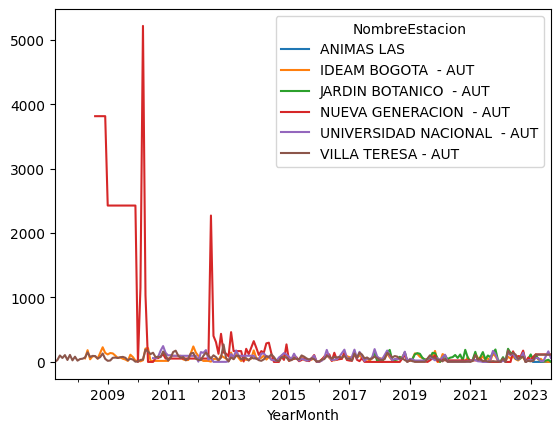

In [168]:
# What's the regional average price of a HASS avocado every day?
lluvias['YearMonth'] = lluvias['FechaObservacion'].dt.to_period('M')  # This will create year-month periods
lluvias.groupby(['YearMonth', 'NombreEstacion'])['ValorObservado'].sum().unstack().ffill().plot();
#lluvias.groupby(['YearMonth'])['ValorObservado'].sum().ffill().plot();

In [158]:
def _valor_spread(group):
    # Custom logic to calculate spread; adjust as needed based on available columns
    # Here we assume the group has two categories to calculate a difference (dummy example)
    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    # Hypothetical example for two columns named 'TypeA' and 'TypeB'
    type_a = group['TypeA'].squeeze()
    type_b = group['TypeB'].squeeze()
    diff = type_a - type_b
    return diff

def valor_spread_by_estacion(df):
    """
    Calculate the spread of 'ValorObservado' within each station ('NombreEstacion') on a monthly basis.
    """
    return (
        df
        .set_index(['YearMonth', 'NombreEstacion'])['ValorObservado']
        .unstack(level='NombreEstacion')
        .ffill()
        .groupby(level='NombreEstacion', axis=1)
        .apply(_valor_spread)
    )

<ipython-input-158-8fc5200ea180>:18: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


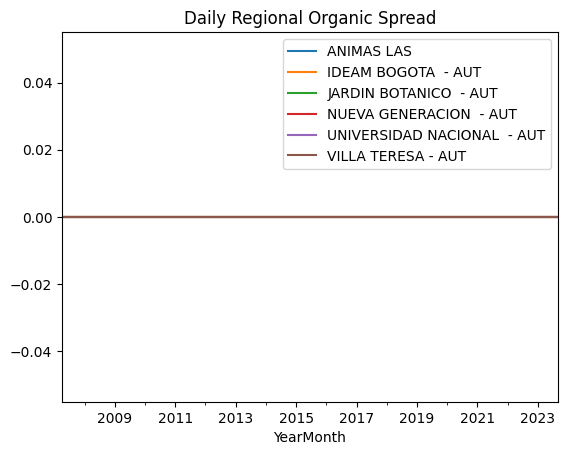

In [164]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


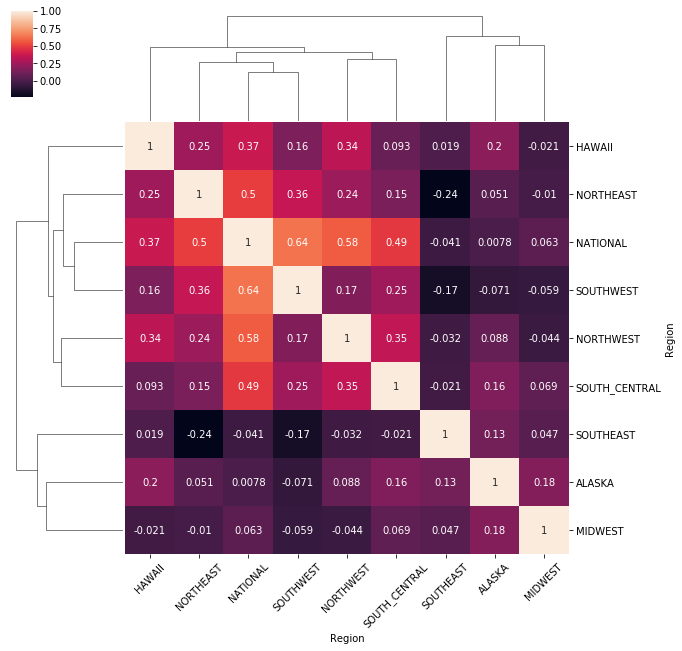

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!